# In Search of a New Musical Genre, Using Spotify Data
**Alex Nisnevich**

I want to come up with a new musical genre.

[justification, basic summary of project]

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

[how spotify-genre-features works]

In [5]:
songs = pd.read_csv('/Users/alex/Downloads/spotify-genre-features.csv')

In [84]:
songs.sample(5)

,id,genre,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,distance
3088,28NgslGnvoPCT4CpmrqX0r,samba,0.827,0.726,192747,0.49600,0.0000,4,0.1900,-8.865,0,0.2100,84.988,4,0.8050,0.068555
3042,1FVahOIncroD7JyUrEslTm,salsa,0.655,0.544,393810,0.86200,0.0847,0,0.9790,-6.127,0,0.0489,105.500,4,0.4760,0.065891
3620,2GXIN2ZOwvPBvAQHKwkhhO,trip-hop,0.233,0.781,208938,0.66200,0.0137,6,0.2140,-8.301,0,0.0279,106.982,4,0.6750,0.010680
1294,6wlxY8rzW0fhIF9iq10KM2,forro,0.273,0.624,120320,0.56000,0.0000,7,0.0347,-8.462,0,0.0326,97.105,4,0.9100,0.114657
3326,4CURVqfJI39VzWgIjMC9xM,sleep,0.923,0.121,3600014,0.00153,0.9140,10,0.1110,-48.579,0,0.0369,95.180,4,0.0322,0.688365


For the most part, we're interested in genres, not individual songs, so let's pivot by genre (taking the mean of each feature):

In [6]:
genres = songs.pivot_table(index=['genre'])

In [8]:
genres.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
genre,,,,,,,,,,,,,
afrobeat,0.193625,0.657720,325293.000000,0.764620,0.362610,4.280000,0.156580,-8.248540,0.560000,0.064238,118.003660,3.960000,0.819140
ambient,0.808006,0.313802,356026.600000,0.207660,0.896420,5.340000,0.128308,-21.637880,0.520000,0.043848,104.529680,3.800000,0.154952
anime,0.070591,0.567731,247769.961538,0.796692,0.037501,6.653846,0.218781,-5.788577,0.538462,0.067327,128.222308,3.961538,0.543692
black-metal,0.007900,0.267830,323244.980000,0.905980,0.450004,5.920000,0.248532,-5.556940,0.500000,0.093300,123.503000,3.880000,0.142944
bluegrass,0.656116,0.532480,214257.920000,0.500400,0.136489,4.760000,0.194482,-10.648180,0.820000,0.035348,126.398900,3.980000,0.672560


Now let's plot some features against one another and see if we find any obvious gaps.

First, let's try plotting tempo against loudness:

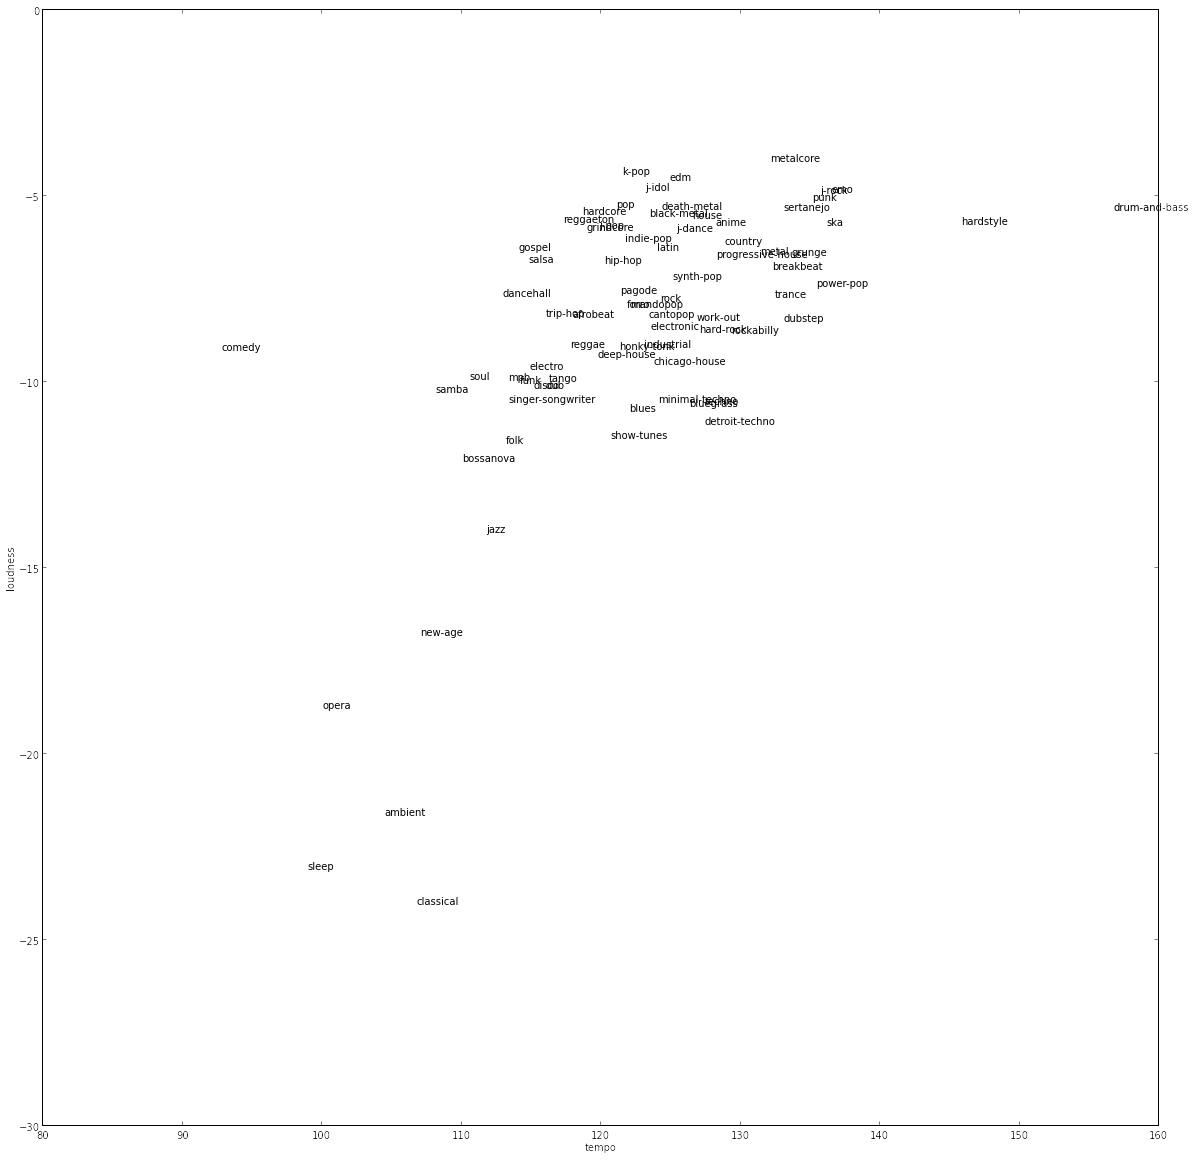

In [13]:
fig, ax = plt.subplots(figsize=(20, 20))
genres.plot.scatter('tempo', 'loudness', ax=ax, s=0) # To get the right x/y bounds
ax.set_xlabel('tempo')
ax.set_ylabel('loudness')
for k, v in genres.iterrows():
    ax.annotate(k, (v['tempo'], v['loudness']))

Nothing too exciting here. Most genres are clustered in a tight ball around 110-140 bpm and loudness in the -13 to -5 dB range.

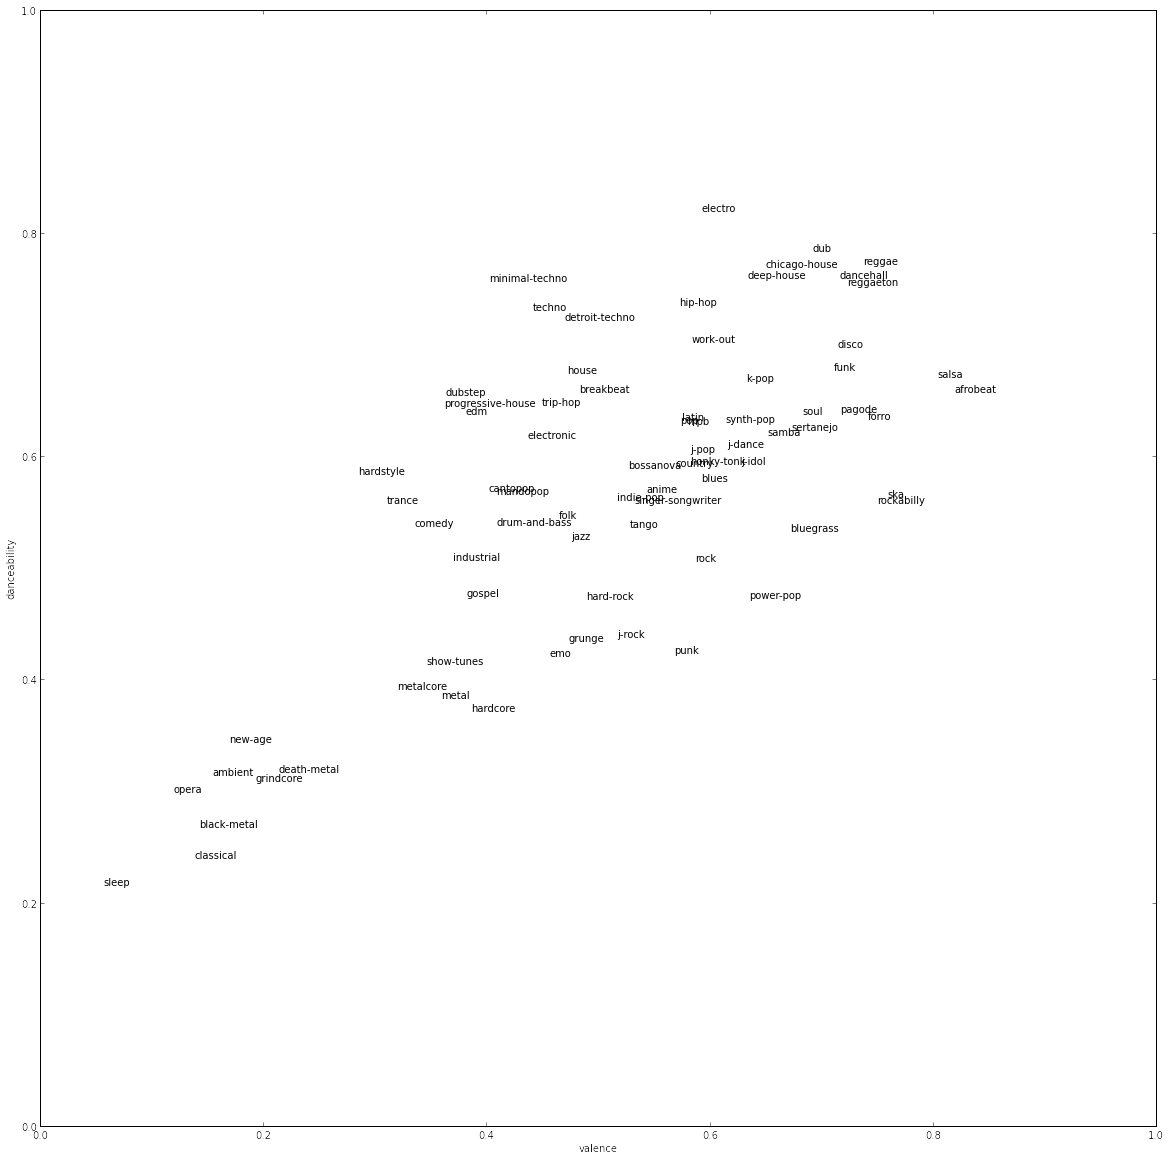

In [10]:
fig, ax = plt.subplots(figsize=(20, 20))
ax.set_xlabel('valence')
ax.set_ylabel('danceability')
for k, v in genres.iterrows():
    ax.annotate(k, (v['valence'], v['danceability']))

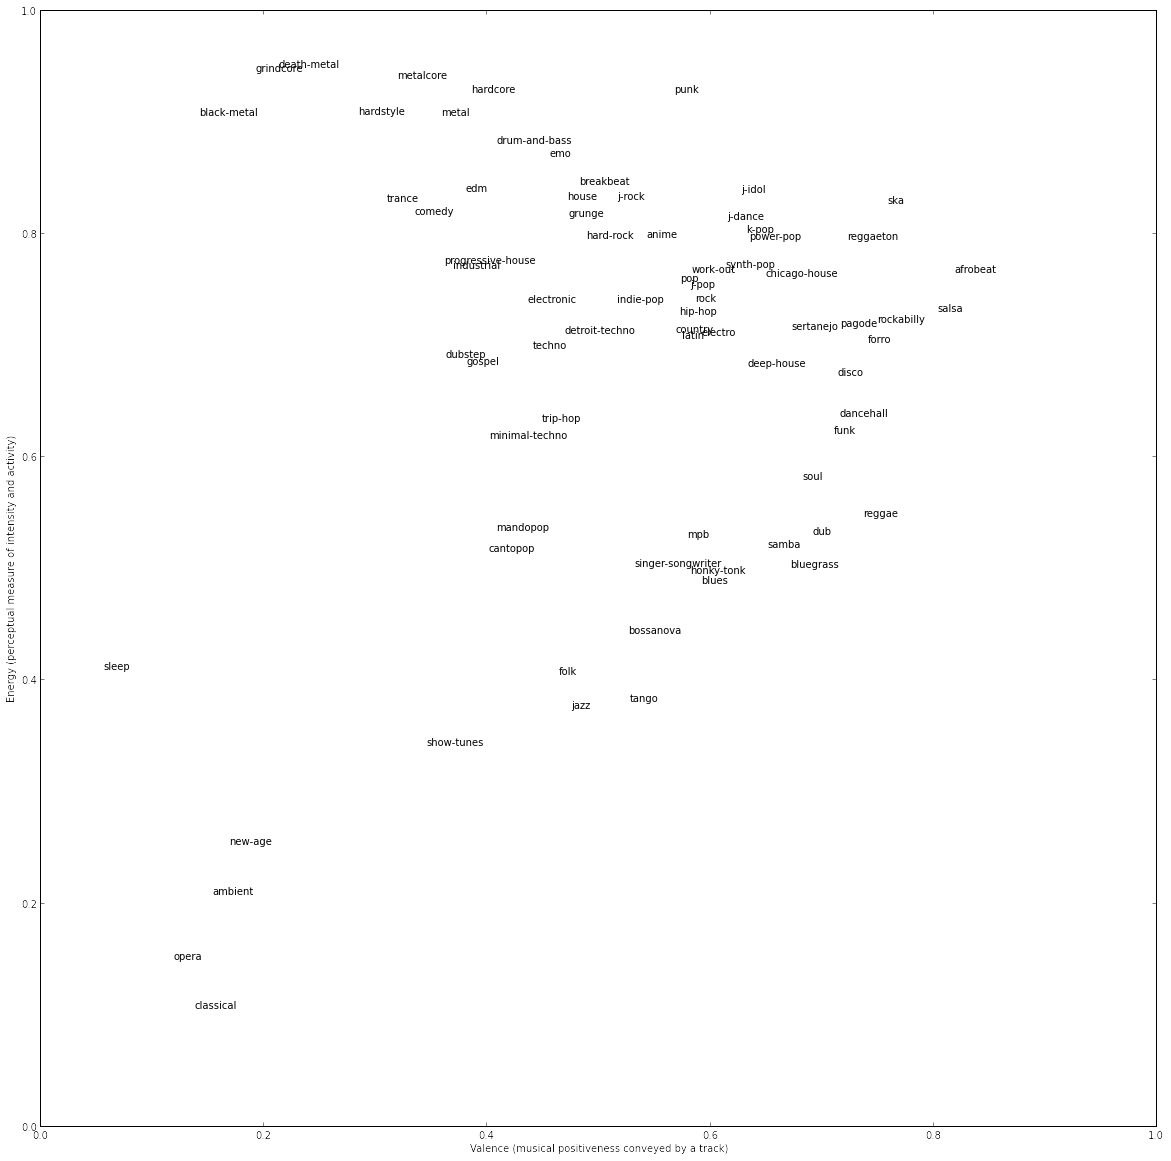

In [9]:
fig, ax = plt.subplots(figsize=(20, 20))
ax.set_xlabel('Valence (musical positiveness conveyed by a track)')
ax.set_ylabel('Energy (perceptual measure of intensity and activity)')
for k, v in genres.iterrows():
    ax.annotate(k, (v['valence'], v['energy']))

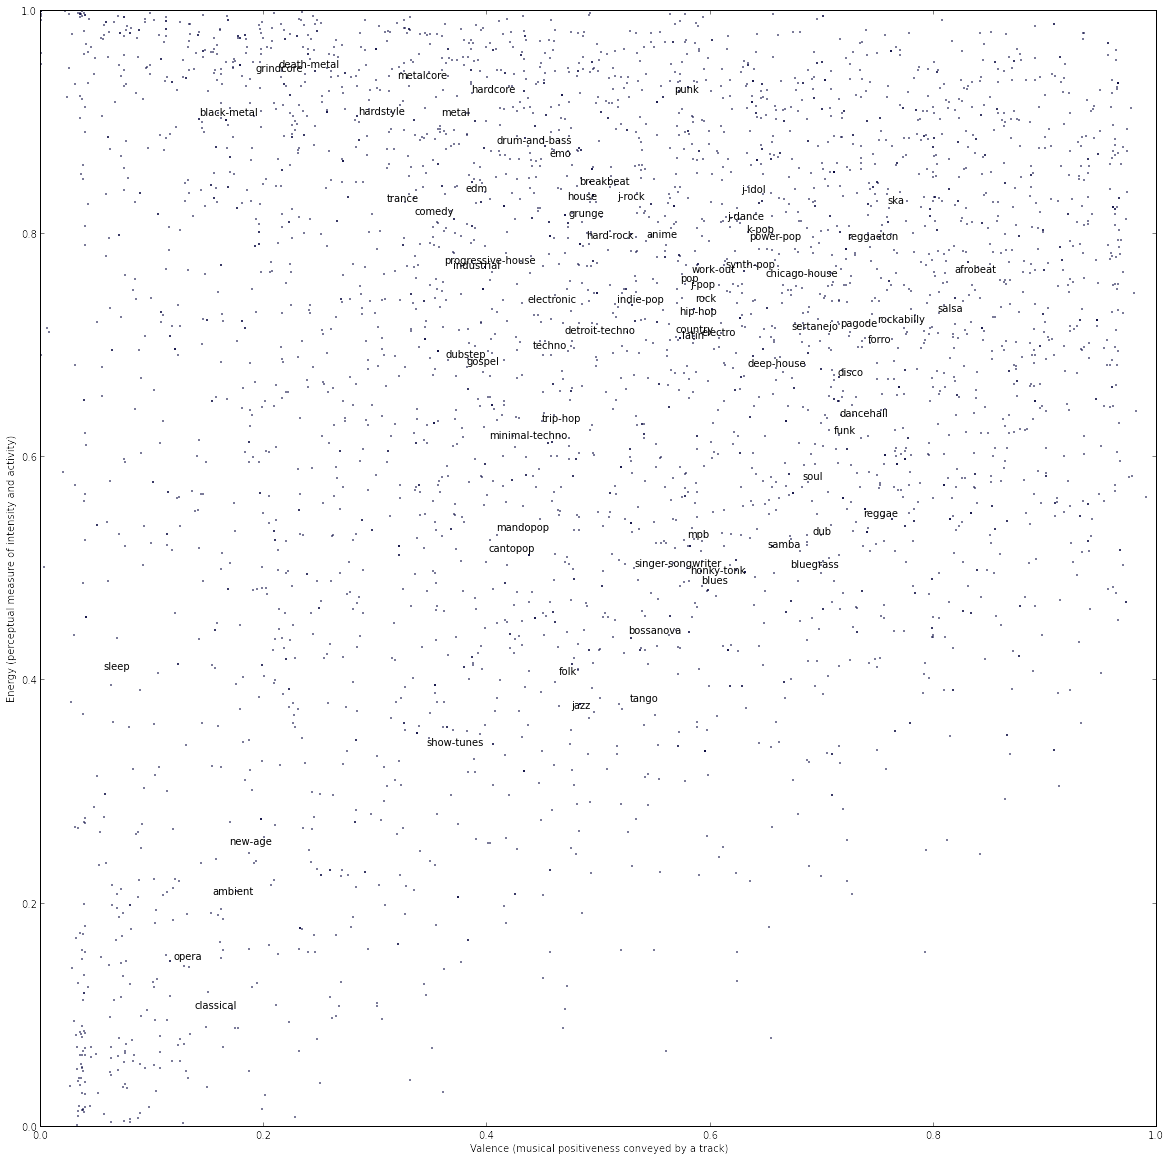

In [34]:
fig, ax = plt.subplots(figsize=(20, 20))
ax.set_xlabel('Valence (musical positiveness conveyed by a track)')
ax.set_ylabel('Energy (perceptual measure of intensity and activity)')
ax.plot(songs.valence, songs.energy, marker='o', linestyle='', ms=1)
for k, v in genres.iterrows():
    ax.annotate(k, (v['valence'], v['energy']))

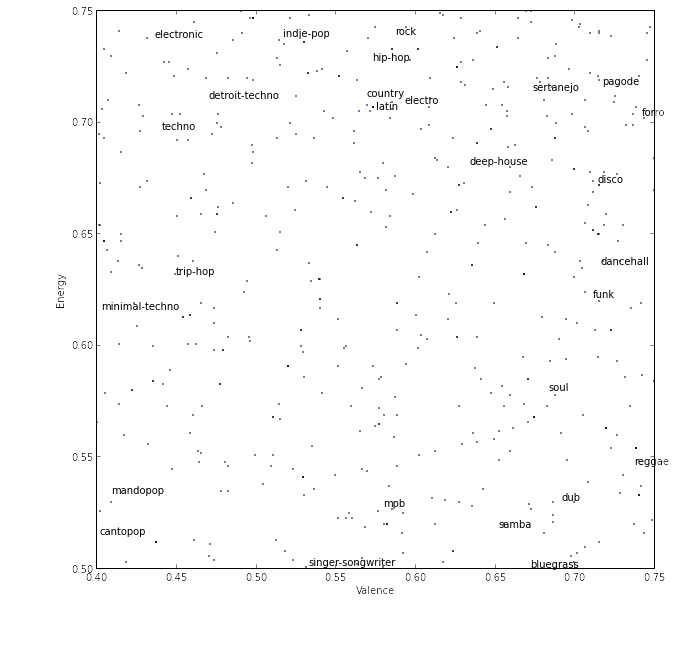

In [49]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_xlabel('Valence')
ax.set_ylabel('Energy')
ax.plot(songs.valence, songs.energy, marker='o', linestyle='', ms=1)
ax.set_xbound([0.4, 0.75])
ax.set_ybound([0.5, 0.75])
for k, v in genres.iterrows():
    ax.annotate(k, (v['valence'], v['energy']))

In [57]:
x_target = (genres['valence']['latin'] + genres['valence']['mpb']) / 2

In [56]:
y_target = (genres['energy']['trip-hop'] + genres['energy']['funk']) / 2

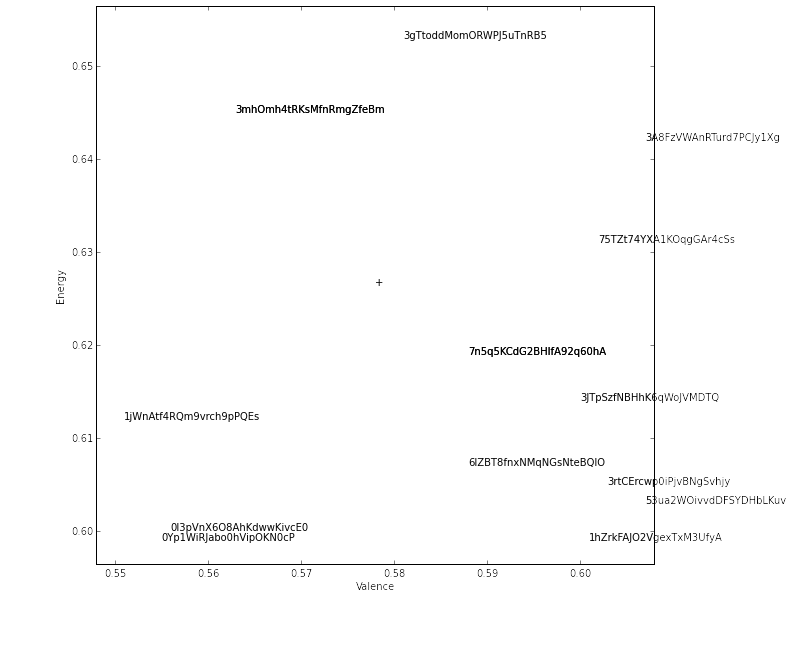

In [62]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_xlabel('Valence')
ax.set_ylabel('Energy')
ax.set_xbound([x_target - 0.03, x_target + 0.03])
ax.set_ybound([y_target - 0.03, y_target + 0.03])
ax.annotate('+', (x_target, y_target))
for k, v in songs.iterrows():
    ax.annotate(v['id'], (v['valence'], v['energy']))

In [80]:
songs['distance'] = abs(songs['valence'] - x_target) ** 2 + abs(songs['energy'] - y_target) ** 2

In [83]:
songs.sort_values('distance')[:10]

,id,genre,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,distance
388,7n5q5KCdG2BHlfA92q60hA,cantopop,0.37700,0.718,205464,0.619,0.000000,4,0.0912,-8.500,1,0.0298,98.011,4,0.588,0.000156
2214,7n5q5KCdG2BHlfA92q60hA,mandopop,0.37700,0.718,205464,0.619,0.000000,4,0.0912,-8.500,1,0.0298,98.011,4,0.588,0.000156
3466,6IZBT8fnxNMqNGsNteBQlO,tango,0.16900,0.572,203373,0.607,0.879000,0,0.0923,-8.214,1,0.1190,66.821,4,0.588,0.000478
2941,3mhOmh4tRKsMfnRmgZfeBm,rock,0.00187,0.552,299733,0.645,0.000001,7,0.0424,-6.595,1,0.0268,89.518,4,0.563,0.000569
1475,3mhOmh4tRKsMfnRmgZfeBm,grunge,0.00187,0.552,299733,0.645,0.000001,7,0.0424,-6.595,1,0.0268,89.518,4,0.563,0.000569
543,75TZt74YXA1KOqgGAr4cSs,comedy,0.87000,0.586,333264,0.631,0.000000,10,0.2980,-8.676,1,0.9050,82.155,4,0.602,0.000598
2963,3JTpSzfNBHhK6qWoJVMDTQ,rockabilly,0.67600,0.602,140120,0.614,0.000003,7,0.2040,-11.799,1,0.0679,140.046,4,0.600,0.000640
249,3gTtoddMomORWPJ5uTnRB5,blues,0.10600,0.509,222306,0.653,0.023100,4,0.1110,-6.367,0,0.0987,116.413,4,0.581,0.000715
42,1jWnAtf4RQm9vrch9pPQEs,afrobeat,0.35600,0.705,249307,0.612,0.906000,10,0.1120,-6.533,0,0.0352,130.335,4,0.551,0.000936
1223,04hjgHUAAnaJpqNgF4unA8,emo,0.29200,0.485,136560,0.658,0.000000,7,0.0898,-5.197,0,0.0466,71.854,4,0.584,0.001033


- [Fly with me (『莫非,這就是愛情』片頭曲) By 溫嵐](https://open.spotify.com/track/7n5q5KCdG2BHlfA92q60hA)
- [La Vista Gorda by Fernando Otero](https://open.spotify.com/track/6IZBT8fnxNMqNGsNteBQlO)
- [Far Behind by Candlebox](https://open.spotify.com/track/3mhOmh4tRKsMfnRmgZfeBm)